# Load the data 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Attribute Information: 
1. age 
2. sex 
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Dealing with Missing Data

There are several columns that are categorical data
+ sex
+ cp
+ fbs
+ restecg
+ exang
+ slope
+ ca
+ thal

In [7]:
df['sex'].unique()

array([1, 0])

In [8]:
df['cp'].unique()

array([3, 2, 1, 0])

In [9]:
df['fbs'].unique()

array([1, 0])

In [10]:
df['restecg'].unique()

array([0, 1, 2])

In [11]:
df['exang'].unique()

array([0, 1])

In [12]:
df['slope'].unique()

array([0, 2, 1])

In [13]:
df['ca'].unique() ## Those 4 may represents outliers

array([0, 2, 1, 3, 4])

In [14]:
df['thal'].unique() ## These 0 may represents missing values

array([1, 2, 3, 0])

In [20]:
len(df.loc[df['ca'] == 4]) # Delete those data

5

In [21]:
len(df.loc[df['thal'] == 0]) # Delete those data

2

In [25]:
df_no_missing = df.loc[(df['ca'] != 4)
                      &
                      (df['thal'] != 0)]

In [26]:
len(df_no_missing)

296

In [28]:
df_no_missing['ca'].unique() # check whether 4 are been deleted

array([0, 2, 1, 3])

In [29]:
df_no_missing['thal'].unique() # check whether 0 are been deleted

array([1, 2, 3])

# Format Data

In [30]:
# Split X and y
X = df_no_missing.drop('target', axis=1).copy()
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [32]:
y = df_no_missing['target'].copy()
y.value_counts()

1    160
0    136
Name: target, dtype: int64

In [33]:
# One-hot encoding (those columns that have more two data values)
X_encoded = pd.get_dummies(X, columns=['cp',
                                      'restecg',
                                      'slope',
                                      'thal'])
## ca is not included because it is a numerical data 
## (although its values 0,1,2,3 make it seems a categorical data)

X_encoded.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  cp_0  ...  \
0   63    1       145   233    1      150      0      2.3   0     0  ...   
1   37    1       130   250    0      187      0      3.5   0     0  ...   
2   41    0       130   204    0      172      0      1.4   0     0  ...   
3   56    1       120   236    0      178      0      0.8   0     0  ...   
4   57    0       120   354    0      163      1      0.6   0     1  ...   

   cp_3  restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  thal_1  \
0     1          1          0          0        1        0        0       1   
1     0          0          1          0        1        0        0       0   
2     0          1          0          0        0        0        1       0   
3     0          0          1          0        0        0        1       0   
4     0          0          1          0        0        0        1       0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0  

[5 rows x 22 columns]

# Build A Preliminary Classification Tree 

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=1818)

# create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=1818)
clf_dt = clf_dt.fit(X_train, y_train)

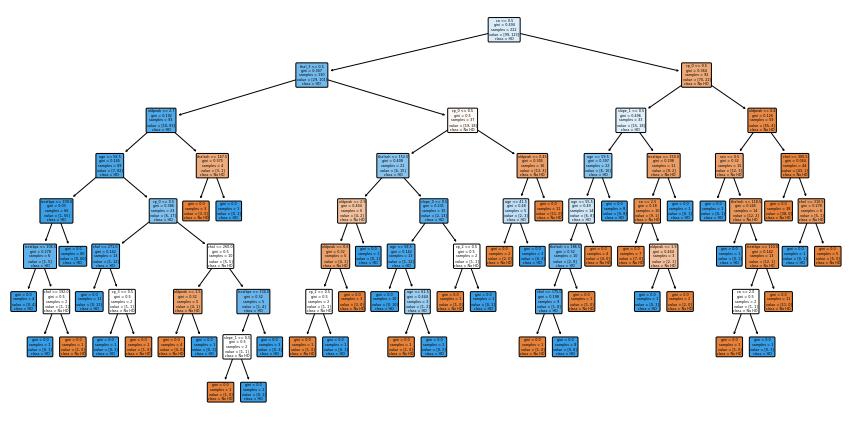

In [46]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=["No HD", "HD"],
         feature_names=X_encoded.columns)
plt.show()

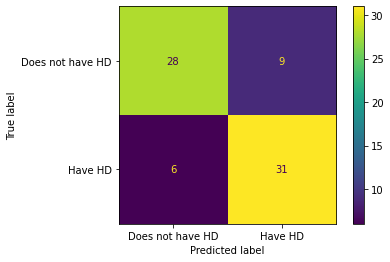

In [47]:
# confusion matrix
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD","Have HD"])

# Cost Complexity Pruning Part 1: Visualize alpha

**Decision Tree** are notorious for being **overfit** to the **Training Dataset**, and pruning a tree with **cost complexity pruning** is a simple way to deal with it.

Pruning a decision tree is all about finding the right value for the pruning parameter, $\alpha$, which controls how little or how much pruning happens. One way to find the optimal value for $\alpha$ is to plot the accuracy of the tree as a funcion of different values. We'll do this for both the **Training Dataset** and the **Testing Dataset**.

First, let's extract the different values of $\alpha$ that are available for this tree and build a pruned tree for each value for $\alpha$. **NOTE:** We omit the maximum value for alpha with ccp_alphas = ccp_alphas[:-1] because it would prune all leaves, leaving us with only a root instead of a tree.

In [49]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision tree into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=1818, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

Now let's graph the accuracy of the trees using the **Training Dataset** and the **Testing Dataset** as a function of alpha.

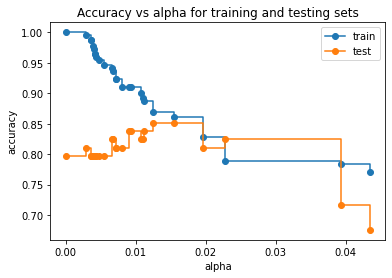

In [50]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the **Testing Dataset** hits its maximum value when $\alpha$ is about 0.014. We should set ccp_alpha = 0.014.

Since there are many ways we could have divided the original dataset into **Training** and **Testing** datasets, how do we know we used the best **Training Dataset** and how do we know we used the best **Testing Dataset**? Typically, we answer this question with **10-Fold Cross Validation**. So that's what we're going to do now, and we'll do it with the cross_val_score() function. 

# Cost Complexity Pruning Part 2: Cross Validation For Finding the Best Alpha

The graph we just draw suggested that one value for alpha, 0.014, but another set of data might suggest another optimal value. 

First, let's demonstrate that different training and testing datasets result in trees with different accuracies when we set ccp_alpha=0.014. We will do this by using the cross_val_score() function to generate different training and testing datasets and then train and test the tree with those datasets.

<AxesSubplot:xlabel='tree'>

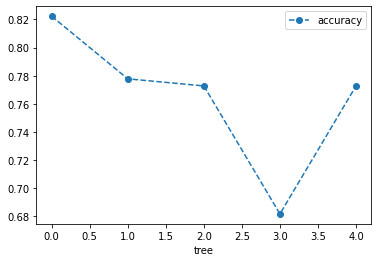

In [55]:
clf_dt = DecisionTreeClassifier(random_state=1818, ccp_alpha=0.014) # create the tree with ccp_alpha=0.014

## now use 5-fold cross validation creates 5 different training and testing datasets that
## are then used to train and test the tree.
## NOTE: We use 5-fold because we don't have tons of data...
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

The graph above shows that using different **Training** and **Testing** data with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to the datasets. So, instead of picking a single **Training** dataset and single **Testing** dataset, let's use **cross validation** to find the optimal value for ccp_alpha. 

<AxesSubplot:xlabel='alpha'>

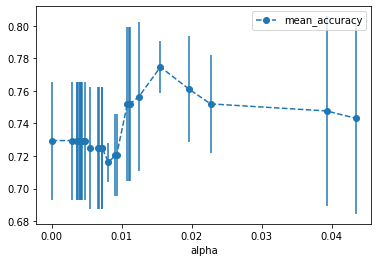

In [56]:
## create an array to store the results of each fold during cross validation
alpha_loop_values = []

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values...
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=1818, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## Now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha         
alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='--')

Using cross validation, we can see that, over all, instead of setting ccp_alpha=0.014, we need to set it to something closer to 0.016. We can find the exact value with:

In [57]:
alpha_results[(alpha_results['alpha'] > 0.01)
             &
             (alpha_results['alpha'] < 0.02)]

alpha  mean_accuracy       std
18  0.010811       0.751818  0.047194
19  0.010982       0.751818  0.047194
20  0.011149       0.751818  0.047194
21  0.012449       0.756364  0.045681
22  0.015543       0.774646  0.015921
23  0.019656       0.761010  0.032398

The exact value is 0.015.
Now let's store the ideal value for alpha so that we can use it to build the best tree.

In [61]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.013)
                                &
                                (alpha_results['alpha'] < 0.016)]['alpha']
ideal_ccp_alpha

22    0.015543
Name: alpha, dtype: float64

In [62]:
# convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.015543180004941495

# Building, Evaluating, Drawing, and Interpreting the Final Classification Tree

In [63]:
## Build and train a new decision tree, only this time use the optimal value for alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=1818,
                                      ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

Now, let's draw another confusion matrix to see if the pruned tree does better. 

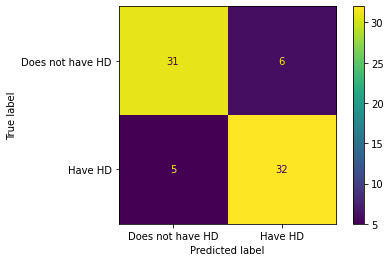

In [64]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=["Does not have HD","Have HD"])

The last thing we are going to do is draw the pruned tree and discuss how to interpret it. 

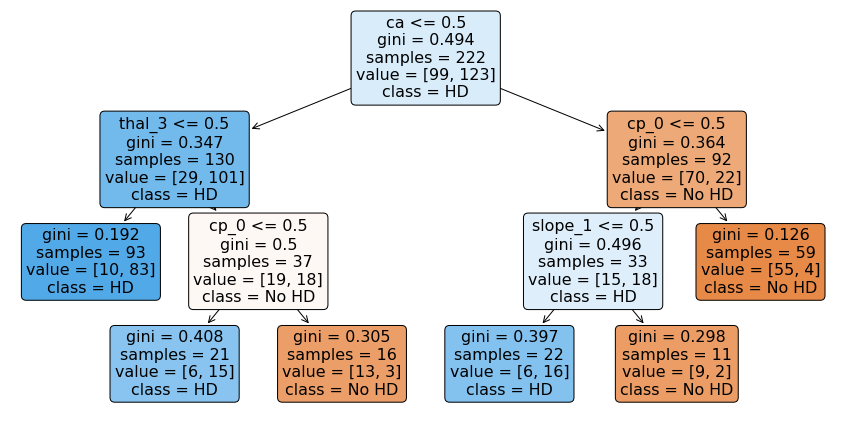

In [65]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
         filled=True,
         rounded=True,
         class_names=["No HD", "HD"],
         feature_names=X_encoded.columns)
plt.show()